In [3]:
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd
import cv2
import sys
import multiprocess

In [4]:
# import python file containining constants for all folder and file paths.
sys.path.insert(0, '../')
import data_paths as dp

D:\wildfire-sumatera-dataset already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\sentinel-2 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\prefire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\prefire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire already exist


In [5]:
# function for plotting band's value
def plot_bands(dictionary):
    for key, val in dictionary.items():
        plt.figure(figsize=(15,10))
        plt.title(key)
        sns.histplot(val.reshape(-1), bins=256)
        plt.show()

# Functions

In [6]:
def display_image(*args, figsize=(15, 10), title="", cmap=None):
    """
    Function to show an image of band(s) of image satellite.
    *args = received an array of floats containing value (pixels) of band(s)
    size  = receive a tuple (width, height) for the size of image being showned
    title = received a string for title of the image
    """
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.imshow(*args, cmap=cmap)
    plt.show()

In [7]:

def get_img_as_array(filepath, dictionary):
    """
    This functions is used to open a .tiff files inside the file path and return it as a dictionary which consists of:
    1. key   = band name
    2. value = array of floats which represent the value of satellite image band
    """
    os.chdir(filepath)
    print(filepath)
    band_imgs = {}
    for key, val in dictionary.items():
        # open the .tiff file
        if os.path.exists(filepath):
            tiff_file = gdal.Open(key)
            bands = key.split('_')
            for i, band in enumerate(bands):
                band_imgs[band] = tiff_file.GetRasterBand(i+1).ReadAsArray()
    
    return band_imgs

In [8]:
def get_all_imgs_as_array(filepaths, dictionary):
    """
    this function is used to return array of dictionaries
    """
    
    arr = []
#     os.chdir(folder_path)
    
    for filepath in filepaths:
        arr.append(get_img_as_array(filepath, dictionary))
    return arr

In [9]:
def convert_to_jpeg(bands=[], file_path=""):
    """
    This function is used to convert three channel numpy arrays into a jpeg format
    which the bands must be input reverse.
    """
    if not bands:
        print("bands cannot be empty")
        return 
    
    if not file_path:
        print("filename cannot be empty")
        return
    img = cv2.merge(bands)
    cv2.imwrite(file_path, img*256)
    return True

# Creating dataframe (metadata) for landsat-8 images
Include:
1. folder_paths = use to store all folder paths
2. class = use to determine the label of the image
3. mean_dnbr = stores mean of pixels in delta normalized burned ratio. 
4. median_dnbr = stores median of pixels in delta normalized burned ratio.

In [83]:
# getting list of folder paths
landsat_dictionary = {
    'folder_paths_geotiff' : [],
    'class' : [],
    'mean_dnbr' : [],
    'median_dnbr' : [],
}
landsat_dictionary['folder_paths'] = os.listdir(dp.LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH)
# sort using key = int to convert data to int first before sorting
landsat_dictionary['folder_paths'].sort(key=int)

# adding a folder path of its parent 
landsat_dictionary['folder_paths'] = [dp.LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH + "\\" + folder_name 
                                      for folder_name in landsat_dictionary['folder_paths']] 
landsat_dictionary

{'folder_paths': ['D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8\\postfire\\0',
  'D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8\\postfire\\1',
  'D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8\\postfire\\2',
  'D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8\\postfire\\3',
  'D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8\\postfire\\4',
  'D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8\\postfire\\5',
  'D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8\\postfire\\6',
  'D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8\\postfire\\7',
  'D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8\\postfire\\8',
  'D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8\\postfire\\9',
  'D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8\\postfire\\10',
  'D:\\wildfire-sumatera-dataset\\wil

In [88]:
# getting statistics median, mean
landsat_dictionary['mean_dnbr'] = []
landsat_dictionary['median_dnbr'] = []

for folder in landsat_dictionary['folder_paths']:
    img_band = get_img_as_array(folder, landsat_postfire_dict)
    
    # find mean of dnbr only value above 0
    temp = img_band['dnbr']
    temp = np.where(temp>0, temp, np.nan)
    landsat_dictionary['mean_dnbr'].append(np.nanmean(temp))
    landsat_dictionary['median_dnbr'].append(np.nanmedian(temp))
    print(len(landsat_dictionary['mean_dnbr']))
    print(len(landsat_dictionary['median_dnbr']))
    


D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\0
1
1
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1
2
2
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2
3
3
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3
4
4
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4
5
5
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5
6
6
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6
7
7
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7
8
8
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\8
9
9
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\9
10
10
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\10
11
11
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\11
12
12
D:\wildfire-sumatera-dataset\wil

101
101
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\101
102
102
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\102
103
103
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\103
104
104
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\104
105
105
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\105
106
106
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\106
107
107
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\107
108
108
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\108
109
109
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\109
110
110
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\110
111
111
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\111
112
112
D:\wildfire-sumatera-dataset\wildfire-sumatera

198
198
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\198
199
199
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\199
200
200
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\200
201
201
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\201
202
202
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\202
203
203
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\203
204
204
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\204
205
205
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\205
206
206
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\206
207
207
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\207
208
208
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\208
209
209
D:\wildfire-sumatera-dataset\wildfire-sumatera

295
295
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\295
296
296
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\296
297
297
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\297
298
298
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\298
299
299
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\299
300
300
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\300
301
301
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\301
302
302
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\302
303
303
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\303
304
304
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\304
305
305
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\305
306
306
D:\wildfire-sumatera-dataset\wildfire-sumatera

392
392
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\392
393
393
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\393
394
394
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\394
395
395
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\395
396
396
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\396
397
397
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\397
398
398
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\398
399
399
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\399
400
400
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\400
401
401
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\401
402
402
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\402
403
403
D:\wildfire-sumatera-dataset\wildfire-sumatera

488
488
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\488
489
489
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\489
490
490
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\490
491
491
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\491
492
492
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\492
493
493
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\493
494
494
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\494
495
495
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\495
496
496
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\496
497
497
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\497
498
498
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\498
499
499
D:\wildfire-sumatera-dataset\wildfire-sumatera

585
585
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\585
586
586
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\586
587
587
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\587
588
588
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\588
589
589
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\589
590
590
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\590
591
591
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\591
592
592
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\592
593
593
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\593
594
594
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\594
595
595
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\595
596
596
D:\wildfire-sumatera-dataset\wildfire-sumatera

681
681
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\681
682
682
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\682
683
683
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\683
684
684
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\684
685
685
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\685
686
686
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\686
687
687
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\687
688
688
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\688
689
689
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\689
690
690
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\690
691
691
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\691
692
692
D:\wildfire-sumatera-dataset\wildfire-sumatera

778
778
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\778
779
779
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\779
780
780
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\780
781
781
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\781
782
782
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\782
783
783
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\783
784
784
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\784
785
785
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\785
786
786
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\786
787
787
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\787
788
788
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\788
789
789
D:\wildfire-sumatera-dataset\wildfire-sumatera

875
875
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\875
876
876
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\876
877
877
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\877
878
878
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\878
879
879
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\879
880
880
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\880
881
881
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\881
882
882
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\882
883
883
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\883
884
884
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\884
885
885
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\885
886
886
D:\wildfire-sumatera-dataset\wildfire-sumatera

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\971
972
972
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\972
973
973
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\973
974
974
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\974
975
975
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\975
976
976
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\976
977
977
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\977
978
978
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\978
979
979
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\979
980
980
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\980
981
981
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\981
982
982
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff

1065
1065
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1065
1066
1066
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1066
1067
1067
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1067
1068
1068
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1068
1069
1069
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1069
1070
1070
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1070
1071
1071
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1071
1072
1072
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1072
1073
1073
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1073
1074
1074
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1074
1075
1075
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1075
1076
1076
D:\wildfire

1158
1158
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1158
1159
1159
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1159
1160
1160
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1160
1161
1161
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1161
1162
1162
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1162
1163
1163
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1163
1164
1164
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1164
1165
1165
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1165
1166
1166
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1166
1167
1167
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1167
1168
1168
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1168
1169
1169
D:\wildfire

1251
1251
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1251
1252
1252
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1252
1253
1253
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1253
1254
1254
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1254
1255
1255
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1255
1256
1256
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1256
1257
1257
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1257
1258
1258
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1258
1259
1259
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1259
1260
1260
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1260
1261
1261
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1261
1262
1262
D:\wildfire

1345
1345
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1345
1346
1346
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1346
1347
1347
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1347
1348
1348
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1348
1349
1349
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1349
1350
1350
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1350
1351
1351
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1351
1352
1352
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1352
1353
1353
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1353
1354
1354
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1354
1355
1355
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1355
1356
1356
D:\wildfire

1439
1439
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1439
1440
1440
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1440
1441
1441
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1441
1442
1442
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1442
1443
1443
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1443
1444
1444
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1444
1445
1445
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1445
1446
1446
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1446
1447
1447
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1447
1448
1448
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1448
1449
1449
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1449
1450
1450
D:\wildfire

1532
1532
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1532
1533
1533
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1533
1534
1534
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1534
1535
1535
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1535
1536
1536
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1536
1537
1537
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1537
1538
1538
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1538
1539
1539
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1539
1540
1540
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1540
1541
1541
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1541
1542
1542
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1542
1543
1543
D:\wildfire

1625
1625
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1625
1626
1626
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1626
1627
1627
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1627
1628
1628
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1628
1629
1629
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1629
1630
1630
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1630
1631
1631
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1631
1632
1632
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1632
1633
1633
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1633
1634
1634
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1634
1635
1635
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1635
1636
1636
D:\wildfire

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1718
1719
1719
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1719
1720
1720
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1720
1721
1721
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1721
1722
1722
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1722
1723
1723
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1723
1724
1724
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1724
1725
1725
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1725
1726
1726
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1726
1727
1727
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1727
1728
1728
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1728
1729
1729
D:\wildfire-sumatera-

1811
1811
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1811
1812
1812
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1812
1813
1813
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1813
1814
1814
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1814
1815
1815
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1815
1816
1816
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1816
1817
1817
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1817
1818
1818
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1818
1819
1819
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1819
1820
1820
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1820
1821
1821
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1821
1822
1822
D:\wildfire

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1904
1905
1905
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1905
1906
1906
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1906
1907
1907
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1907
1908
1908
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1908
1909
1909
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1909
1910
1910
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1910
1911
1911
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1911
1912
1912
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1912
1913
1913
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1913
1914
1914
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1914
1915
1915
D:\wildfire-sumatera-

1997
1997
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1997
1998
1998
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1998
1999
1999
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\1999
2000
2000
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2000
2001
2001
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2001
2002
2002
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2002
2003
2003
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2003
2004
2004
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2004
2005
2005
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2005
2006
2006
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2006
2007
2007
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2007
2008
2008
D:\wildfire

2090
2090
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2090
2091
2091
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2091
2092
2092
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2092
2093
2093
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2093
2094
2094
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2094
2095
2095
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2095
2096
2096
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2096
2097
2097
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2097
2098
2098
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2098
2099
2099
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2099
2100
2100
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2100
2101
2101
D:\wildfire

2184
2184
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2184
2185
2185
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2185
2186
2186
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2186
2187
2187
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2187
2188
2188
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2188
2189
2189
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2189
2190
2190
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2190
2191
2191
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2191
2192
2192
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2192
2193
2193
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2193
2194
2194
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2194
2195
2195
D:\wildfire

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2276
2277
2277
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2277
2278
2278
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2278
2279
2279
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2279
2280
2280
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2280
2281
2281
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2281
2282
2282
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2282
2283
2283
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2283
2284
2284
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2284
2285
2285
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2285
2286
2286
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2286
2287
2287
D:\wildfire-sumatera-

2370
2370
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2370
2371
2371
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2371
2372
2372
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2372
2373
2373
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2373
2374
2374
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2374
2375
2375
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2375
2376
2376
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2376
2377
2377
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2377
2378
2378
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2378
2379
2379
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2379
2380
2380
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2380
2381
2381
D:\wildfire

2463
2463
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2463
2464
2464
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2464
2465
2465
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2465
2466
2466
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2466
2467
2467
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2467
2468
2468
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2468
2469
2469
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2469
2470
2470
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2470
2471
2471
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2471
2472
2472
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2472
2473
2473
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2473
2474
2474
D:\wildfire

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2555
2556
2556
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2556
2557
2557
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2557
2558
2558
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2558
2559
2559
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2559
2560
2560
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2560
2561
2561
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2561
2562
2562
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2562
2563
2563
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2563
2564
2564
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2564
2565
2565
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2565
2566
2566
D:\wildfire-sumatera-

2649
2649
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2649
2650
2650
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2650
2651
2651
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2651
2652
2652
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2652
2653
2653
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2653
2654
2654
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2654
2655
2655
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2655
2656
2656
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2656
2657
2657
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2657
2658
2658
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2658
2659
2659
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2659
2660
2660
D:\wildfire

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2742
2743
2743
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2743
2744
2744
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2744
2745
2745
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2745
2746
2746
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2746
2747
2747
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2747
2748
2748
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2748
2749
2749
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2749
2750
2750
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2750
2751
2751
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2751
2752
2752
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2752
2753
2753
D:\wildfire-sumatera-

2835
2835
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2835
2836
2836
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2836
2837
2837
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2837
2838
2838
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2838
2839
2839
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2839
2840
2840
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2840
2841
2841
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2841
2842
2842
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2842
2843
2843
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2843
2844
2844
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2844
2845
2845
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2845
2846
2846
D:\wildfire

2929
2929
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2929
2930
2930
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2930
2931
2931
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2931
2932
2932
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2932
2933
2933
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2933
2934
2934
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2934
2935
2935
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2935
2936
2936
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2936
2937
2937
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2937
2938
2938
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2938
2939
2939
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\2939
2940
2940
D:\wildfire

3023
3023
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3023
3024
3024
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3024
3025
3025
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3025
3026
3026
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3026
3027
3027
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3027
3028
3028
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3028
3029
3029
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3029
3030
3030
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3030
3031
3031
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3031
3032
3032
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3032
3033
3033
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3033
3034
3034
D:\wildfire

3117
3117
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3117
3118
3118
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3118
3119
3119
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3119
3120
3120
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3120
3121
3121
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3121
3122
3122
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3122
3123
3123
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3123
3124
3124
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3124
3125
3125
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3125
3126
3126
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3126
3127
3127
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3127
3128
3128
D:\wildfire

3210
3210
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3210
3211
3211
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3211
3212
3212
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3212
3213
3213
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3213
3214
3214
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3214
3215
3215
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3215
3216
3216
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3216
3217
3217
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3217
3218
3218
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3218
3219
3219
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3219
3220
3220
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3220
3221
3221
D:\wildfire

3303
3303
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3303
3304
3304
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3304
3305
3305
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3305
3306
3306
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3306
3307
3307
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3307
3308
3308
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3308
3309
3309
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3309
3310
3310
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3310
3311
3311
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3311
3312
3312
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3312
3313
3313
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3313
3314
3314
D:\wildfire

3397
3397
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3397
3398
3398
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3398
3399
3399
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3399
3400
3400
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3400
3401
3401
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3401
3402
3402
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3402
3403
3403
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3403
3404
3404
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3404
3405
3405
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3405
3406
3406
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3406
3407
3407
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3407
3408
3408
D:\wildfire

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3489
3490
3490
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3490
3491
3491
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3491
3492
3492
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3492
3493
3493
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3493
3494
3494
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3494
3495
3495
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3495
3496
3496
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3496
3497
3497
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3497
3498
3498
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3498
3499
3499
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3499
3500
3500
D:\wildfire-sumatera-

3582
3582
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3582
3583
3583
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3583
3584
3584
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3584
3585
3585
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3585
3586
3586
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3586
3587
3587
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3587
3588
3588
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3588
3589
3589
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3589
3590
3590
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3590
3591
3591
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3591
3592
3592
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3592
3593
3593
D:\wildfire

3675
3675
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3675
3676
3676
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3676
3677
3677
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3677
3678
3678
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3678
3679
3679
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3679
3680
3680
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3680
3681
3681
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3681
3682
3682
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3682
3683
3683
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3683
3684
3684
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3684
3685
3685
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3685
3686
3686
D:\wildfire

3769
3769
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3769
3770
3770
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3770
3771
3771
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3771
3772
3772
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3772
3773
3773
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3773
3774
3774
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3774
3775
3775
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3775
3776
3776
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3776
3777
3777
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3777
3778
3778
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3778
3779
3779
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3779
3780
3780
D:\wildfire

3863
3863
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3863
3864
3864
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3864
3865
3865
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3865
3866
3866
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3866
3867
3867
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3867
3868
3868
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3868
3869
3869
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3869
3870
3870
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3870
3871
3871
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3871
3872
3872
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3872
3873
3873
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3873
3874
3874
D:\wildfire

3956
3956
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3956
3957
3957
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3957
3958
3958
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3958
3959
3959
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3959
3960
3960
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3960
3961
3961
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3961
3962
3962
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3962
3963
3963
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3963
3964
3964
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3964
3965
3965
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3965
3966
3966
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\3966
3967
3967
D:\wildfire

4050
4050
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4050
4051
4051
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4051
4052
4052
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4052
4053
4053
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4053
4054
4054
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4054
4055
4055
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4055
4056
4056
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4056
4057
4057
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4057
4058
4058
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4058
4059
4059
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4059
4060
4060
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4060
4061
4061
D:\wildfire

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4142
4143
4143
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4143
4144
4144
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4144
4145
4145
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4145
4146
4146
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4146
4147
4147
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4147
4148
4148
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4148
4149
4149
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4149
4150
4150
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4150
4151
4151
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4151
4152
4152
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4152
4153
4153
D:\wildfire-sumatera-

4235
4235
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4235
4236
4236
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4236
4237
4237
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4237
4238
4238
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4238
4239
4239
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4239
4240
4240
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4240
4241
4241
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4241
4242
4242
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4242
4243
4243
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4243
4244
4244
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4244
4245
4245
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4245
4246
4246
D:\wildfire

4328
4328
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4328
4329
4329
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4329
4330
4330
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4330
4331
4331
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4331
4332
4332
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4332
4333
4333
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4333
4334
4334
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4334
4335
4335
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4335
4336
4336
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4336
4337
4337
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4337
4338
4338
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4338
4339
4339
D:\wildfire

4421
4421
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4421
4422
4422
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4422
4423
4423
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4423
4424
4424
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4424
4425
4425
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4425
4426
4426
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4426
4427
4427
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4427
4428
4428
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4428
4429
4429
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4429
4430
4430
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4430
4431
4431
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4431
4432
4432
D:\wildfire

4514
4514
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4514
4515
4515
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4515
4516
4516
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4516
4517
4517
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4517
4518
4518
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4518
4519
4519
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4519
4520
4520
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4520
4521
4521
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4521
4522
4522
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4522
4523
4523
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4523
4524
4524
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4524
4525
4525
D:\wildfire

4607
4607
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4607
4608
4608
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4608
4609
4609
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4609
4610
4610
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4610
4611
4611
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4611
4612
4612
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4612
4613
4613
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4613
4614
4614
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4614
4615
4615
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4615
4616
4616
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4616
4617
4617
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4617
4618
4618
D:\wildfire

4700
4700
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4700
4701
4701
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4701
4702
4702
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4702
4703
4703
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4703
4704
4704
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4704
4705
4705
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4705
4706
4706
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4706
4707
4707
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4707
4708
4708
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4708
4709
4709
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4709
4710
4710
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4710
4711
4711
D:\wildfire

4793
4793
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4793
4794
4794
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4794
4795
4795
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4795
4796
4796
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4796
4797
4797
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4797
4798
4798
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4798
4799
4799
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4799
4800
4800
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4800
4801
4801
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4801
4802
4802
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4802
4803
4803
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4803
4804
4804
D:\wildfire

4887
4887
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4887
4888
4888
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4888
4889
4889
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4889
4890
4890
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4890
4891
4891
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4891
4892
4892
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4892
4893
4893
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4893
4894
4894
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4894
4895
4895
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4895
4896
4896
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4896
4897
4897
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4897
4898
4898
D:\wildfire

4980
4980
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4980
4981
4981
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4981
4982
4982
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4982
4983
4983
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4983
4984
4984
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4984
4985
4985
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4985
4986
4986
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4986
4987
4987
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4987
4988
4988
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4988
4989
4989
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4989
4990
4990
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\4990
4991
4991
D:\wildfire

5073
5073
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5073
5074
5074
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5074
5075
5075
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5075
5076
5076
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5076
5077
5077
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5077
5078
5078
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5078
5079
5079
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5079
5080
5080
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5080
5081
5081
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5081
5082
5082
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5082
5083
5083
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5083
5084
5084
D:\wildfire

5167
5167
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5167
5168
5168
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5168
5169
5169
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5169
5170
5170
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5170
5171
5171
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5171
5172
5172
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5172
5173
5173
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5173
5174
5174
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5174
5175
5175
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5175
5176
5176
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5176
5177
5177
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5177
5178
5178
D:\wildfire

5260
5260
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5260
5261
5261
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5261
5262
5262
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5262
5263
5263
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5263
5264
5264
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5264
5265
5265
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5265
5266
5266
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5266
5267
5267
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5267
5268
5268
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5268
5269
5269
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5269
5270
5270
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5270
5271
5271
D:\wildfire

5354
5354
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5354
5355
5355
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5355
5356
5356
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5356
5357
5357
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5357
5358
5358
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5358
5359
5359
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5359
5360
5360
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5360
5361
5361
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5361
5362
5362
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5362
5363
5363
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5363
5364
5364
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5364
5365
5365
D:\wildfire

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5446
5447
5447
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5447
5448
5448
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5448
5449
5449
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5449
5450
5450
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5450
5451
5451
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5451
5452
5452
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5452
5453
5453
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5453
5454
5454
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5454
5455
5455
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5455
5456
5456
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5456
5457
5457
D:\wildfire-sumatera-

5540
5540
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5540
5541
5541
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5541
5542
5542
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5542
5543
5543
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5543
5544
5544
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5544
5545
5545
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5545
5546
5546
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5546
5547
5547
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5547
5548
5548
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5548
5549
5549
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5549
5550
5550
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5550
5551
5551
D:\wildfire

5634
5634
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5634
5635
5635
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5635
5636
5636
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5636
5637
5637
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5637
5638
5638
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5638
5639
5639
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5639
5640
5640
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5640
5641
5641
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5641
5642
5642
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5642
5643
5643
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5643
5644
5644
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5644
5645
5645
D:\wildfire

5727
5727
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5727
5728
5728
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5728
5729
5729
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5729
5730
5730
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5730
5731
5731
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5731
5732
5732
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5732
5733
5733
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5733
5734
5734
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5734
5735
5735
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5735
5736
5736
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5736
5737
5737
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5737
5738
5738
D:\wildfire

5820
5820
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5820
5821
5821
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5821
5822
5822
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5822
5823
5823
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5823
5824
5824
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5824
5825
5825
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5825
5826
5826
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5826
5827
5827
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5827
5828
5828
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5828
5829
5829
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5829
5830
5830
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5830
5831
5831
D:\wildfire

5913
5913
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5913
5914
5914
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5914
5915
5915
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5915
5916
5916
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5916
5917
5917
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5917
5918
5918
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5918
5919
5919
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5919
5920
5920
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5920
5921
5921
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5921
5922
5922
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5922
5923
5923
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5923
5924
5924
D:\wildfire

6006
6006
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6006
6007
6007
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6007
6008
6008
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6008
6009
6009
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6009
6010
6010
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6010
6011
6011
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6011
6012
6012
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6012
6013
6013
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6013
6014
6014
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6014
6015
6015
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6015
6016
6016
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6016
6017
6017
D:\wildfire

6100
6100
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6100
6101
6101
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6101
6102
6102
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6102
6103
6103
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6103
6104
6104
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6104
6105
6105
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6105
6106
6106
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6106
6107
6107
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6107
6108
6108
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6108
6109
6109
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6109
6110
6110
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6110
6111
6111
D:\wildfire

6193
6193
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6193
6194
6194
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6194
6195
6195
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6195
6196
6196
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6196
6197
6197
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6197
6198
6198
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6198
6199
6199
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6199
6200
6200
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6200
6201
6201
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6201
6202
6202
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6202
6203
6203
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6203
6204
6204
D:\wildfire

6286
6286
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6286
6287
6287
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6287
6288
6288
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6288
6289
6289
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6289
6290
6290
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6290
6291
6291
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6291
6292
6292
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6292
6293
6293
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6293
6294
6294
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6294
6295
6295
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6295
6296
6296
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6296
6297
6297
D:\wildfire

6379
6379
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6379
6380
6380
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6380
6381
6381
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6381
6382
6382
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6382
6383
6383
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6383
6384
6384
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6384
6385
6385
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6385
6386
6386
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6386
6387
6387
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6387
6388
6388
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6388
6389
6389
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6389
6390
6390
D:\wildfire

6472
6472
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6472
6473
6473
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6473
6474
6474
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6474
6475
6475
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6475
6476
6476
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6476
6477
6477
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6477
6478
6478
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6478
6479
6479
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6479
6480
6480
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6480
6481
6481
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6481
6482
6482
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6482
6483
6483
D:\wildfire

6565
6565
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6565
6566
6566
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6566
6567
6567
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6567
6568
6568
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6568
6569
6569
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6569
6570
6570
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6570
6571
6571
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6571
6572
6572
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6572
6573
6573
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6573
6574
6574
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6574
6575
6575
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6575
6576
6576
D:\wildfire

6658
6658
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6658
6659
6659
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6659
6660
6660
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6660
6661
6661
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6661
6662
6662
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6662
6663
6663
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6663
6664
6664
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6664
6665
6665
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6665
6666
6666
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6666
6667
6667
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6667
6668
6668
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6668
6669
6669
D:\wildfire

6752
6752
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6752
6753
6753
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6753
6754
6754
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6754
6755
6755
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6755
6756
6756
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6756
6757
6757
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6757
6758
6758
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6758
6759
6759
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6759
6760
6760
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6760
6761
6761
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6761
6762
6762
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6762
6763
6763
D:\wildfire

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6845
6846
6846
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6846
6847
6847
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6847
6848
6848
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6848
6849
6849
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6849
6850
6850
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6850
6851
6851
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6851
6852
6852
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6852
6853
6853
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6853
6854
6854
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6854
6855
6855
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6855
6856
6856
D:\wildfire-sumatera-

6939
6939
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6939
6940
6940
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6940
6941
6941
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6941
6942
6942
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6942
6943
6943
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6943
6944
6944
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6944
6945
6945
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6945
6946
6946
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6946
6947
6947
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6947
6948
6948
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6948
6949
6949
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\6949
6950
6950
D:\wildfire

7032
7032
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7032
7033
7033
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7033
7034
7034
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7034
7035
7035
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7035
7036
7036
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7036
7037
7037
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7037
7038
7038
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7038
7039
7039
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7039
7040
7040
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7040
7041
7041
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7041
7042
7042
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7042
7043
7043
D:\wildfire

7126
7126
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7126
7127
7127
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7127
7128
7128
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7128
7129
7129
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7129
7130
7130
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7130
7131
7131
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7131
7132
7132
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7132
7133
7133
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7133
7134
7134
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7134
7135
7135
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7135
7136
7136
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7136
7137
7137
D:\wildfire

7220
7220
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7220
7221
7221
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7221
7222
7222
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7222
7223
7223
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7223
7224
7224
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7224
7225
7225
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7225
7226
7226
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7226
7227
7227
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7227
7228
7228
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7228
7229
7229
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7229
7230
7230
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7230
7231
7231
D:\wildfire

7314
7314
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7314
7315
7315
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7315
7316
7316
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7316
7317
7317
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7317
7318
7318
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7318
7319
7319
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7319
7320
7320
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7320
7321
7321
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7321
7322
7322
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7322
7323
7323
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7323
7324
7324
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7324
7325
7325
D:\wildfire

7408
7408
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7408
7409
7409
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7409
7410
7410
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7410
7411
7411
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7411
7412
7412
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7412
7413
7413
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7413
7414
7414
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7414
7415
7415
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7415
7416
7416
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7416
7417
7417
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7417
7418
7418
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7418
7419
7419
D:\wildfire

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7501
7502
7502
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7502
7503
7503
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7503
7504
7504
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7504
7505
7505
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7505
7506
7506
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7506
7507
7507
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7507
7508
7508
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7508
7509
7509
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7509
7510
7510
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7510
7511
7511
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7511
7512
7512
D:\wildfire-sumatera-

7594
7594
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7594
7595
7595
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7595
7596
7596
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7596
7597
7597
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7597
7598
7598
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7598
7599
7599
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7599
7600
7600
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7600
7601
7601
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7601
7602
7602
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7602
7603
7603
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7603
7604
7604
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7604
7605
7605
D:\wildfire

7687
7687
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7687
7688
7688
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7688
7689
7689
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7689
7690
7690
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7690
7691
7691
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7691
7692
7692
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7692
7693
7693
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7693
7694
7694
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7694
7695
7695
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7695
7696
7696
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7696
7697
7697
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7697
7698
7698
D:\wildfire

7780
7780
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7780
7781
7781
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7781
7782
7782
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7782
7783
7783
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7783
7784
7784
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7784
7785
7785
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7785
7786
7786
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7786
7787
7787
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7787
7788
7788
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7788
7789
7789
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7789
7790
7790
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\7790
7791
7791
D:\wildfire

## Export to .csv file

In [104]:
# convert to pandas DataFrame and export as .csv file
# landsat_8_df = pd.DataFrame(landsat_dictionary)
# landsat_8_df.to_csv(dp.METADATA_LANDSAT_8_FILE_PATH, index=False)

In [28]:
landsat_metadata.drop(columns=['class'], inplace=True)

# Landsat-8

In [11]:
landsat_metadata = pd.read_csv(dp.METADATA_LANDSAT_8_FILE_PATH)
FACTOR=2
# dictionaty for reading the file in each folder
landsat_postfire_dict = {
    'dnbr_b7': 2,
    'b5_b4': 2,
    'b3_b2': 2
}

## Landsat-8 Postfire

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire\5624


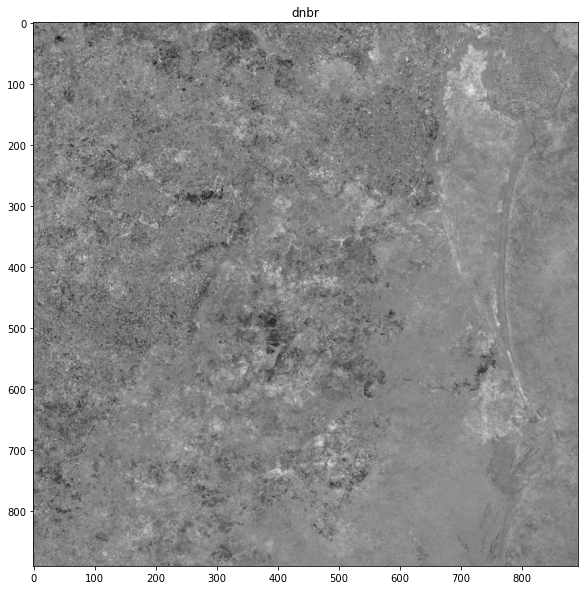

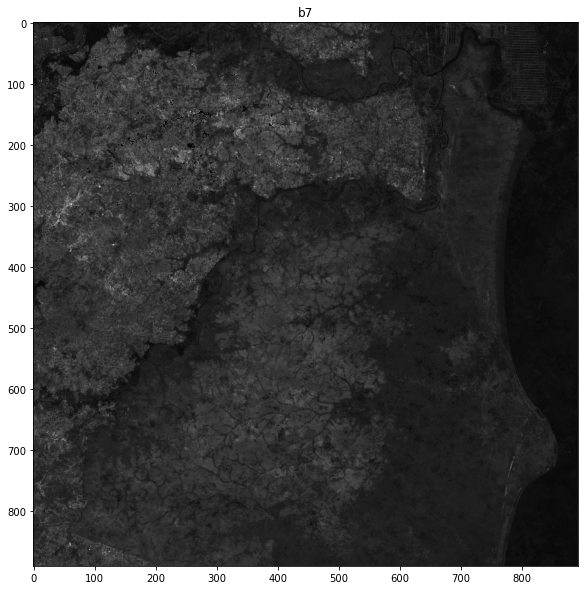

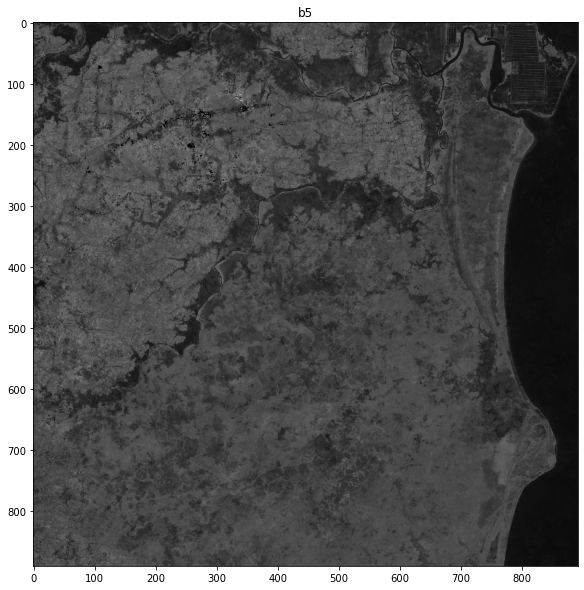

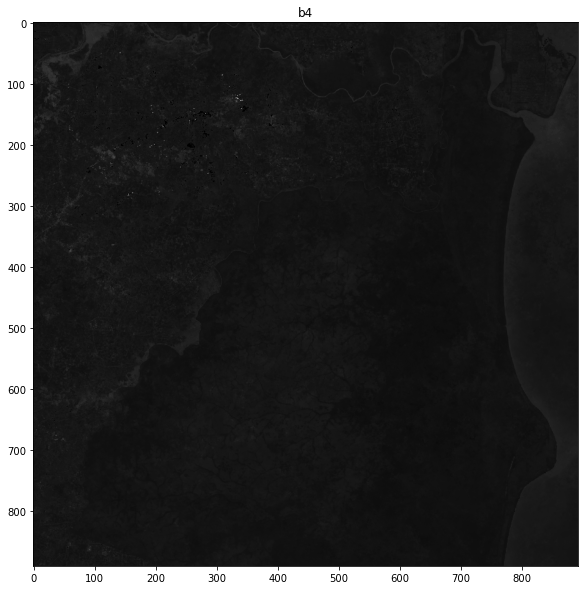

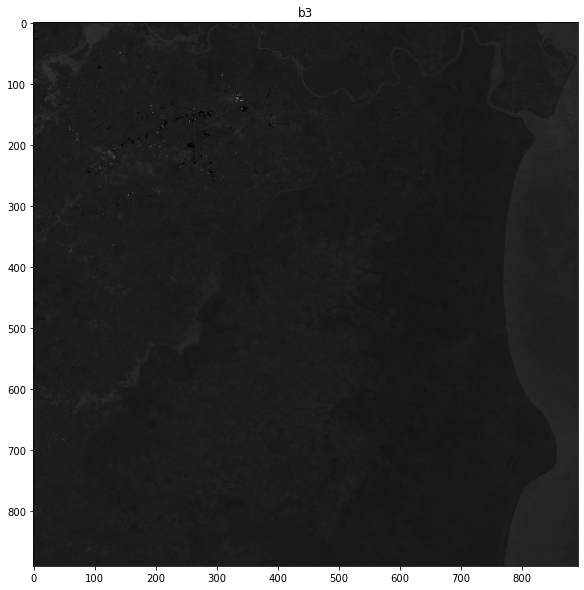

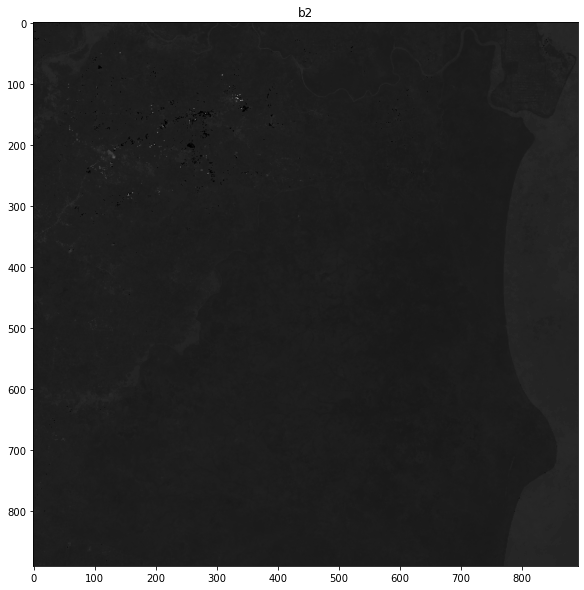

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


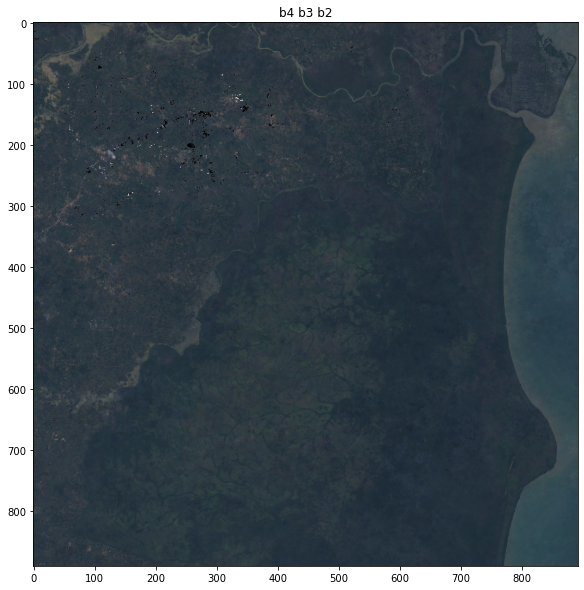

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


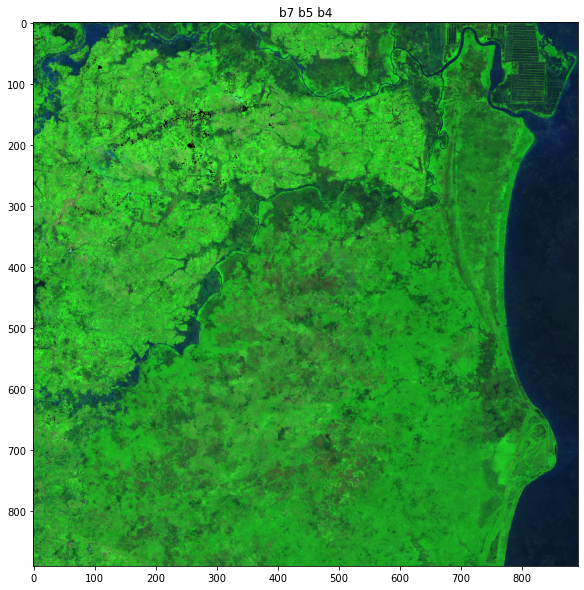

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


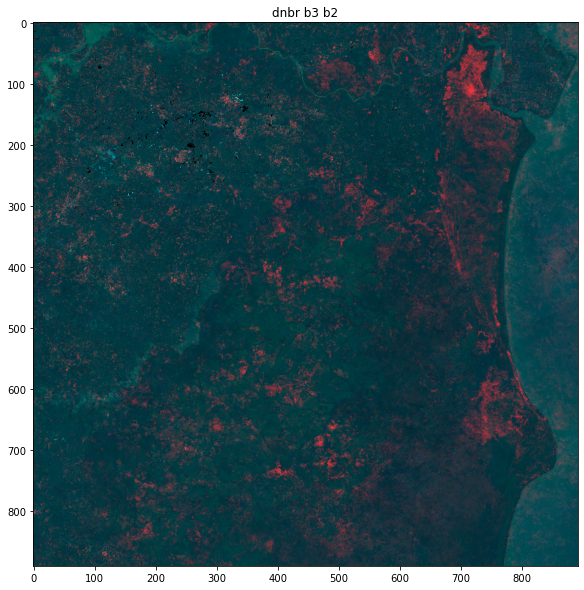

In [13]:
landsat_postfire_dict = {
    'dnbr_b7': 2,
    'b5_b4': 2,
    'b3_b2': 2
}
os.chdir(dp.LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH)
landsat_postfire_img_band = get_img_as_array(
    os.path.abspath(landsat_metadata['folder_paths_geotiff'][5624]), 
    landsat_postfire_dict,
)

for band, img in landsat_postfire_img_band.items():
    display_image(img, figsize=(100, 10), title=band, cmap="gray")

b4_b3_b2 = np.dstack(
    (
        landsat_postfire_img_band['b4'], 
        landsat_postfire_img_band['b3'], 
        landsat_postfire_img_band['b2'],
    )
)
b7_b5_b4 = np.dstack(
    (
        landsat_postfire_img_band['b7'], 
        landsat_postfire_img_band['b5'], 
        landsat_postfire_img_band['b4'],
    )
)

dnbr_b3_b2 = np.dstack(
    (
        landsat_postfire_img_band['dnbr'],
        landsat_postfire_img_band['b3'],
        landsat_postfire_img_band['b2'],
    )
)

display_image(b4_b3_b2*FACTOR, figsize=(100, 10), title="b4 b3 b2")
display_image(b7_b5_b4*FACTOR, figsize=(100, 10), title="b7 b5 b4")
display_image(dnbr_b3_b2*FACTOR, figsize=(100, 10), title="dnbr b3 b2")

# Plot Mean dNBR (Delta Normalized Burned Ratio)

Determine class of the image based on mean of Delta Normalized Burned Ration of each image

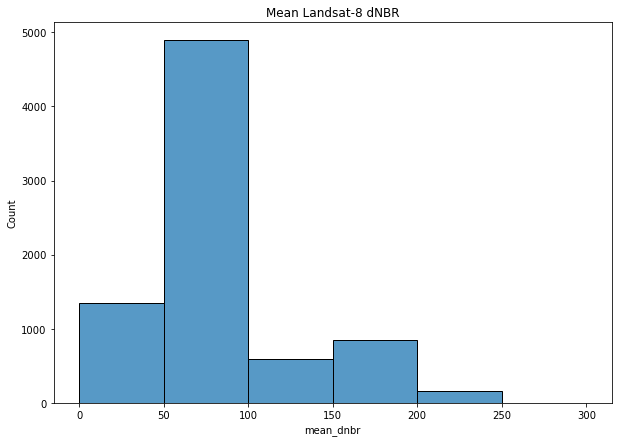

In [68]:
bins = [i*1000 for i in np.arange(0,0.35,0.05)]

plt.figure(figsize=(10,7))
plt.title("Mean Landsat-8 dNBR")
sns.histplot(landsat_metadata['mean_dnbr']*1000, bins=bins)
plt.show()

Based on the histogram plot above, we will determine class as based on this terms:
1. if mean below <= 0.05 class 0
2. if mean below <= 0.1 class 1
3. if mean below 0.1 <  class 2

In [56]:
# if mean below <= 0.05 class 0
# if mean below <= 0.1 class 1
# if mean below 0.1 <  class 2
burn_severity_class = []

for mean_dnbr in landsat_metadata['mean_dnbr']:
    if mean_dnbr <= 0.05:
        burn_severity_class.append(0)
    elif mean_dnbr <= 0.1:
        burn_severity_class.append(1)
    else:
        burn_severity_class .append(2)

In [57]:
landsat_metadata['class'] = burn_severity_class
landsat_metadata.head()

folder_paths_geotiff  mean_dnbr  median_dnbr  \
0  D:\wildfire-sumatera-dataset\wildfire-sumatera...   0.050867     0.028118   
1  D:\wildfire-sumatera-dataset\wildfire-sumatera...   0.050547     0.027762   
2  D:\wildfire-sumatera-dataset\wildfire-sumatera...   0.054626     0.029420   
3  D:\wildfire-sumatera-dataset\wildfire-sumatera...   0.027477     0.017275   
4  D:\wildfire-sumatera-dataset\wildfire-sumatera...   0.050742     0.028028   

   image_condition                                    file_paths_jpeg  class  
0                1  D:\wildfire-sumatera-dataset\wildfire-sumatera...      1  
1                1  D:\wildfire-sumatera-dataset\wildfire-sumatera...      1  
2                1  D:\wildfire-sumatera-dataset\wildfire-sumatera...      1  
3                1  D:\wildfire-sumatera-dataset\wildfire-sumatera...      0  
4                1  D:\wildfire-sumatera-dataset\wildfire-sumatera...      1

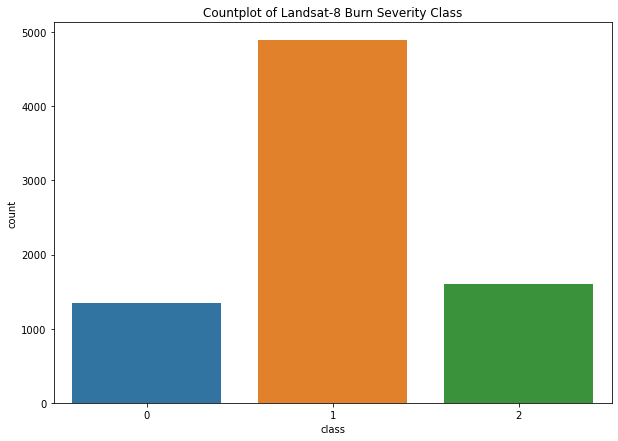

In [58]:
plt.figure(figsize=(10,7))
plt.title("Countplot of Landsat-8 Burn Severity Class")
sns.countplot(x='class', data=landsat_metadata)
plt.show()

# Export to .csv file

In [61]:
landsat_metadata.to_csv(dp.METADATA_LANDSAT_8_FILE_PATH, index=False)

# Plot Median dNBR

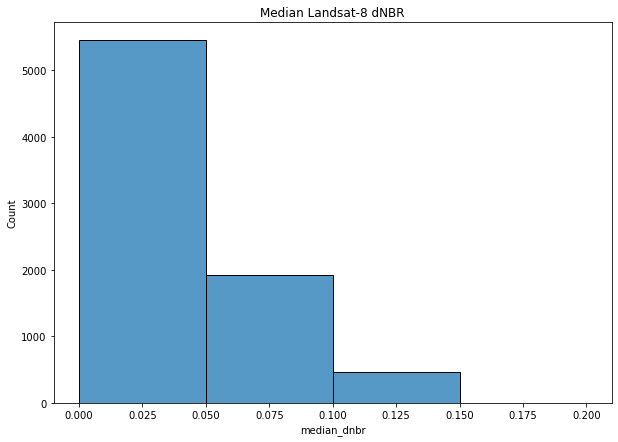

In [36]:
bins = [i for i in np.arange(0,0.25,0.05)]

plt.figure(figsize=(10,7))
plt.title("Median Landsat-8 dNBR")
sns.histplot(landsat_metadata['median_dnbr'], bins=bins)
plt.show()

## Convert to .jpeg file

In [64]:
image_condition = []
file_paths_jpeg = []
ext = ".jpeg"
for folder in landsat_metadata['folder_paths_geotiff']:
    file_path = dp.LANDSAT_8_JPEG_FOLDER_PATH + "\\" + folder.split('\\')[-1] + ext
    file_paths_jpeg.append(file_path)
    if not os.path.exists(file_path):
        try:
            landsat_postfire_img_band = get_img_as_array(folder, landsat_postfire_dict)
            result = convert_to_jpeg(
                bands = [
                    landsat_postfire_img_band['b2'],
                    landsat_postfire_img_band['b3'],
                    landsat_postfire_img_band['dnbr'], 
                ],
                file_path = file_path,
                )
            if result:
                image_condition.append(1)
        except:
            print(sys.exc_info()[0], "occurred.")
            image_condition.append(0)
    else:
        image_condition.append(1)
        print("{} already exist".format(file_path))

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\0.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\8.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\9.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\10.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\11.jpeg already exist
D:

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1034.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1035.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1036.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1037.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1038.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1039.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1040.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1041.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1042.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1043.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1044.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1669.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1670.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1671.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1672.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1673.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1674.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1675.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1676.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1677.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1678.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\1679.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2180.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2181.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2182.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2183.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2184.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2185.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2186.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2187.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2188.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2189.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2190.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2616.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2617.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2618.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2619.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2620.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2621.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2622.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2623.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2624.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2625.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2626.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2964.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2965.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2966.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2967.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2968.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2969.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2970.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2971.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2972.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2973.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\2974.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3261.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3262.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3263.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3264.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3265.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3266.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3267.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3268.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3269.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3270.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3271.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3558.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3559.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3560.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3561.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3562.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3563.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3564.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3565.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3566.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3567.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3568.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3808.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3809.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3810.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3811.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3812.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3813.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3814.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3815.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3816.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3817.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\3818.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4079.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4080.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4081.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4082.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4083.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4084.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4085.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4086.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4087.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4088.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4089.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4327.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4328.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4329.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4330.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4331.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4332.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4333.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4334.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4335.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4336.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4337.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4559.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4560.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4561.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4562.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4563.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4564.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4565.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4566.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4567.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4568.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4569.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4787.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4788.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4789.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4790.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4791.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4792.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4793.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4794.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4795.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4796.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\4797.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5016.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5017.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5018.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5019.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5020.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5021.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5022.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5023.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5024.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5025.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5026.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5240.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5241.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5242.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5243.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5244.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5245.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5246.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5247.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5248.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5249.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5250.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5450.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5451.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5452.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5453.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5454.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5455.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5456.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5457.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5458.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5459.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5460.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

<class 'cv2.error'> occurred.
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5624.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5625.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5626.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5627.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5628.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5629.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5630.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5631.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5632.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5633.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5634.jpeg already exist
D:\wildfire-sumatera-dat

<class 'cv2.error'> occurred.
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5773.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5774.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5775.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5776.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5777.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5778.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5779.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5780.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5781.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5782.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5783.jpeg already exist
D:\wildfire-sumatera-dat

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5958.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5959.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5960.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5961.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5962.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5963.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5964.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5965.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5966.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5967.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\5968.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6134.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6135.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6136.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6137.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6138.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6139.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6140.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6141.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6142.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6143.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6144.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6314.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6315.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6316.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6317.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6318.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6319.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6320.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6321.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6322.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6323.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6324.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6496.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6497.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6498.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6499.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6500.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6501.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6502.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6503.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6504.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6505.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6506.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6744.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6745.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6746.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6747.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6748.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6749.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6750.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6751.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6752.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6753.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6754.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6906.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6907.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6908.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6909.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6910.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6911.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6912.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6913.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6914.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6915.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\6916.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7057.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7058.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7059.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7060.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7061.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7062.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7063.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7064.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7065.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7066.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7067.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7208.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7209.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7210.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7211.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7212.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7213.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7214.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7215.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7216.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7217.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7218.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7357.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7358.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7359.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7360.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7361.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7362.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7363.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7364.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7365.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7366.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7367.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7514.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7515.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7516.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7517.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7518.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7519.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7520.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7521.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7522.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7523.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7524.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7661.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7662.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7663.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7664.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7665.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7666.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7667.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7668.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7669.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7670.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7671.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7815.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7816.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7817.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7818.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7819.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7820.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7821.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7822.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7823.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7824.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\landsat-8\7825.jpeg already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-jpeg\la

In [65]:
landsat_metadata['image_condition'] = image_condition
landsat_metadata['file_paths_jpeg'] = file_paths_jpeg 

landsat_metadata.to_csv(dp.METADATA_LANDSAT_8_FILE_PATH, index=False)

# Sentinel

## Sentinel Postfire

In [47]:
sentinel_metadata = pd.read_csv(dp.METADATA_SENTINEL_2_FILE_PATH)
sentinel_medadata_copy = sentinel_metadata.copy()
# landsat_prefire_metadata = landsat_medadata_copy.loc[landsat_metadata['class'] == 0].reset_index(drop=True)
sentinel_postfire_metadata = sentinel_medadata_copy.loc[sentinel_metadata['class'] == 1].reset_index(drop=True)
sentinel_postfire_metadata.file[0]
sentinel_postfire_dict = {
    'dnbr_b12': 2,
    'b8_b4': 2,
    'b3_b2': 2
}
sentinel_postfire_img_band = get_img_as_array(sentinel_postfire_metadata['file'][5623], sentinel_postfire_dict)

for band, img in sentinel_postfire_img_band.items():
    display_image(img, figsize=(100, 10), title=band, cmap="gray")

b4_b3_b2 = np.dstack(
    (
        sentinel_postfire_img_band['b4'], 
        sentinel_postfire_img_band['b3'], 
        sentinel_postfire_img_band['b2'],
    )
)
b12_b8_b4 = np.dstack(
    (
        sentinel_postfire_img_band['b12'], 
        sentinel_postfire_img_band['b8'], 
        sentinel_postfire_img_band['b4'],
    )
)

dnbr_b3_b2 = np.dstack(
    (
        sentinel_postfire_img_band['dnbr'],
        sentinel_postfire_img_band['b4'],
        sentinel_postfire_img_band['b3'],
    )
)

display_image(b4_b3_b2*FACTOR, figsize=(100, 10), title="b4 b3 b2")
display_image(b12_b8_b4*FACTOR, figsize=(100, 10), title="b12 b8 b4")
display_image(dnbr_b3_b2*FACTOR, figsize=(100, 10), title="dnbr b3 b2")

AttributeError: module 'data_paths' has no attribute 'METADATA_SENTINEL_2_FILE_PATH'

## Convert to .jpeg file

In [ ]:
image_condition = []
ext = ".jpeg"
for folder in landsat_metadata['folder_paths']:
    file_path = dp.SENTINEL_2_JPEG_FOLDER_PATH + "\\" + folder.split('\\')[-1] + ext
    if not os.path.exists(file_path):
        try:
            landsat_postfire_img_band = get_img_as_array(folder, landsat_postfire_dict)
            result = convert_to_jpeg(
                bands = [
                    landsat_postfire_img_band['b2'],
                    landsat_postfire_img_band['b3'],
                    landsat_postfire_img_band['dnbr'], 
                ],
                file_path = file_path,
                )
            if result:
                image_condition.append(1)
        except:
            print(sys.exc_info()[0], "occurred.")
            image_condition.append(0)
    else:
        image_condition.append(1)
        print("{} already exist".format(file_path))

In [79]:

for letter in 'Python':
    if letter.isupper():
        pass  
    else:
        print('Output: {}'.format(letter))

Output: y
Output: t
Output: h
Output: o
Output: n
